## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats import sem
from sklearn import datasets

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
#
mouse_metadata_pd = pd.DataFrame (mouse_metadata)
study_results_pd = pd.DataFrame (study_results)

# Combine the data into a single dataset
# -------Merge two dataframes using an inner join --- merge_table = pd.merge(_pd, _pd, on="")
MergedMouse_pd = pd.merge(mouse_metadata_pd, study_results_pd, on='Mouse ID')
MergedMouse_pd.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#                                              of the tumor volume for each regimen
#TumVol = MergedMouse_pd['Tumor Volume (mm3)']
#TumVol
# calculating measures of central tendency
mean_TumVol = MergedMouse_pd.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
print(f"The mean TumVol is: \n {mean_TumVol}")

median_TumVol = MergedMouse_pd.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
print(f"The median TumVol is: \n {median_TumVol}")

#mode_TumVol = MergedMouse_pd.groupby("Drug Regimen").mode()["Tumor Volume (mm3)"]
#print(f"The mode TumVol is: \n {mode_TumVol}")

The mean TumVol is: 
 Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The median TumVol is: 
 Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
The count TumVol is: 
 Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


In [ ]:
# calculating the variance and standard deviation using the different modules
var_TumVol = MergedMouse_pd.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
print(f"The population variance is: \n {var_TumVol}")
#  = np.(TumVol,ddof = 0)
sd_TumVol = MergedMouse_pd.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
print(f"The population standard deviation is: \n {sd_TumVol}")


In [ ]:
# Calculate "standard error on means" or SEM

semsTumVol = MergedMouse_pd.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
print(f"The population SEM using the scipy.stats module is: \n {semsTumVol}")

In [ ]:
# ---------------------------------Merge and Rename the values 
MrgTumRegm_pd = pd.DataFrame() #=========creates a new dataframe that's empty
MrgTumRegm_pd = pd.merge(mean_TumVol, median_TumVol, on='Drug Regimen')
MrgTumRegm_pd = MrgTumRegm_pd.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean",
                                              "Tumor Volume (mm3)_y":"Tumor Volume Median"})
MrgTumRegm_pd = pd.merge(MrgTumRegm_pd, var_TumVol, on='Drug Regimen')
MrgTumRegm_pd = pd.merge(MrgTumRegm_pd, sd_TumVol, on='Drug Regimen')
MrgTumRegm_pd = MrgTumRegm_pd.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume StdDev",
                                              "Tumor Volume (mm3)_y":"Tumor Volume Variance"})
MrgTumRegm_pd = pd.merge(MrgTumRegm_pd, semsTumVol, on='Drug Regimen')
MrgTumRegm_pd = MrgTumRegm_pd.rename(columns={"Tumor Volume (mm3)":"Tumor Volume StdErrMeans"})
MrgTumRegm_pd

In [ ]:
# ------------------------display in formated style for readability -----
MrgTumRegm_pd.style.format({'Tumor Volume Mean': "{:.2f}",
                            'Tumor Volume Median': "{:.2f}",
                            'Tumor Volume StdDev': "{:.2f}",
                            'Tumor Volume Variance': "{:.2f}",
                            'Tumor Volume StdErrMeans': "{:.2f}"
                          })

## Bar plots

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [46]:
# calculating counts by regimen
count_TumVol = MergedMouse_pd.groupby("Drug Regimen").count()["Mouse ID"]
#
SortedCntTumvol = count_TumVol.sort_values(ascending=False)
CntTumvol_pd = pd.DataFrame(SortedCntTumvol)
CntTumvol_pd = CntTumvol_pd.rename(columns={"Mouse ID":"RegimenCounts"})

CntTumvol_pd

,RegimenCounts
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


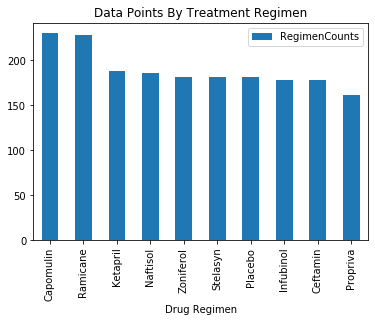

In [49]:
#
count_chart=CntTumvol_pd.plot(kind='bar', title='Data Points By Treatment Regimen')


In [50]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
CntTumvol_pd = CntTumvol_pd.reset_index()

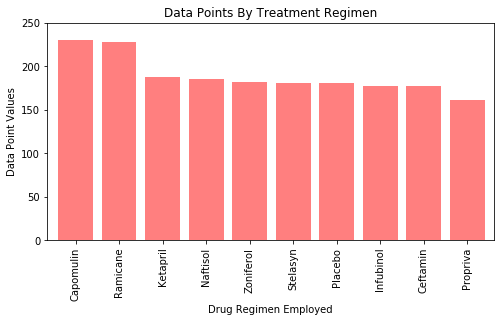

In [51]:
# set x-axis and tick locations
x_axis = np.arange(len(CntTumvol_pd))
tick_locations = [value+0.4 for value in x_axis]    
# set Figure
plt.figure(figsize=(8,4))
# build Bar Chart and display it
plt.bar(x_axis, CntTumvol_pd["RegimenCounts"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, CntTumvol_pd["Drug Regimen"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(CntTumvol_pd["RegimenCounts"])+20)
plt.title("Data Points By Treatment Regimen")
plt.xlabel("Drug Regimen Employed")
plt.ylabel("Data Point Values")
plt.show()

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [86]:
# calculating counts by sex
count_Sex = MergedMouse_pd.groupby("Sex").count()["Mouse ID"]
CntSexTot = MergedMouse_pd.count()['Sex']
#
SortedCntSex = count_Sex.sort_values()
CntSex_pd = pd.DataFrame(SortedCntSex)
CntSex_pd = CntSex_pd.rename(columns={"Mouse ID":"Number Mice By Sex"})
PctSex = CntSex_pd['Number Mice By Sex'] / CntSexTot * 100
#
PctSex_pd = pd.DataFrame(PctSex)
PctSex_pd = PctSex_pd.rename(columns={"Number Mice By Sex":"% Mice By Sex"})
PctSex_pd


Sex
Female    49.392499
Male      50.607501
Name: Number Mice By Sex, dtype: float64

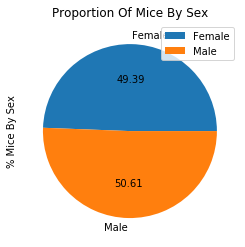

In [89]:
#
count_chart=PctSex_pd.plot(kind='pie', title='Proportion Of Mice By Sex', y="% Mice By Sex", autopct='%.2f')

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
PctSex_pd = PctSex_pd.reset_index()
PctSex_pd

,index,Sex,% Mice By Sex
0,0,Female,49.392499
1,1,Male,50.607501


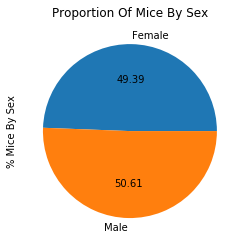

In [106]:
# set x-axis and tick locations
#x_axis = np.arange(len(CntTumvol_pd))
#tick_locations = [value+0.4 for value in x_axis]    
# set Figure
plt.figure(figsize=(8,4))
# build Pie Chart and display it
plt.pie(PctSex_pd["% Mice By Sex"], autopct='%.2f', labels=PctSex_pd["Sex"])
plt.title('Proportion Of Mice By Sex')
plt.ylabel("% Mice By Sex")
#plt.legend(handles=PctSex_pd[['Sex']], loc="best")
plt.show()

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen